**Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**importing Libraraies**

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import os
from collections import defaultdict

In [ ]:
#!nvidia-smi


In [3]:
pwd

'/content'

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/classification01

/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/classification01


In [5]:
pwd

'/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/classification01'

**Extracting and importing Dataset**

In [ ]:
# extracting the compessed Dataset
'''from zipfile import ZipFile
dataset = '/content/drive/MyDrive/Colab Notebooks/E-waste_dataset_preprocessed.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')'''

"from zipfile import ZipFile\ndataset = '/content/drive/MyDrive/Colab Notebooks/E-waste_dataset_preprocessed.zip'\n\nwith ZipFile(dataset,'r') as zip:\n  zip.extractall()\n  print('The dataset is extracted')"

**Importing Dataset folder**

In [6]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/E-waste_dataset_preprocessed_updated/main_file_E-waste classification.v1i.folder/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/E-waste_dataset_preprocessed_updated/main_file_E-waste classification.v1i.folder/val'
test_dir = '/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/E-waste_dataset_preprocessed_updated/main_file_E-waste classification.v1i.folder/test'


**Code for counting the number of images from each class in Train Folder**

In [8]:
# Path to the root directory of your dataset
dataset_root = '/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/E-waste_dataset_preprocessed_updated/main_file_E-waste classification.v1i.folder/train'

# Initialize a dictionary to store the counts for each class
class_counts = defaultdict(int)

# Iterate through the class folders and count the images
for class_folder in os.listdir(dataset_root):
    class_path = os.path.join(dataset_root, class_folder)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_counts.items():
    print(f" Train Class '{class_name}' has {count} images.")


 Train Class 'Monitor' has 120 images.
 Train Class 'Mouse' has 120 images.
 Train Class 'Other_class' has 120 images.
 Train Class 'Mobile' has 120 images.
 Train Class 'Keyboard' has 120 images.
 Train Class 'Laptop' has 120 images.


**Code for counting the number of images from each class in Test Folder**

In [7]:
# Path to the root directory of your dataset
dataset_root = '/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/E-waste_dataset_preprocessed_updated/main_file_E-waste classification.v1i.folder/test'

# Initialize a dictionary to store the counts for each class
class_counts = defaultdict(int)

# Iterate through the class folders and count the images
for class_folder in os.listdir(dataset_root):
    class_path = os.path.join(dataset_root, class_folder)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_counts.items():
    print(f" Test Class '{class_name}' has {count} images.")


 Test Class 'Mouse' has 10 images.
 Test Class 'Monitor' has 10 images.
 Test Class 'Laptop' has 10 images.
 Test Class 'Mobile' has 10 images.
 Test Class 'Other_class' has 10 images.
 Test Class 'Keyboard' has 10 images.


**Code for counting the number of images from each class in Valid Folder**

In [9]:
# Path to the root directory of your dataset
dataset_root = '/content/drive/MyDrive/Colab Notebooks/E-waste_classification_folder/E-waste_dataset_preprocessed_updated/main_file_E-waste classification.v1i.folder/val'

# Initialize a dictionary to store the counts for each class
class_counts = defaultdict(int)

# Iterate through the class folders and count the images
for class_folder in os.listdir(dataset_root):
    class_path = os.path.join(dataset_root, class_folder)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_counts.items():
    print(f"Valid Class '{class_name}' has {count} images.")


Valid Class 'Mouse' has 10 images.
Valid Class 'Monitor' has 10 images.
Valid Class 'Laptop' has 10 images.
Valid Class 'Mobile' has 10 images.
Valid Class 'Other_class' has 10 images.
Valid Class 'Keyboard' has 10 images.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,   # Data augmentation used to reduce overfitiing
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

Found 720 images belonging to 6 classes.
Found 60 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models


**Using Pretrained VGG16 model**

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

model_vgg16 = VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

58889256/58889256 [==============================] - 4s 0us/step


In [14]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
for layer in model_vgg16.layers:
    layer.trainable = False

In [16]:
# Create a new model by adding custom classification layers on top of VGG16
model = models.Sequential()
model.add(model_vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
 # model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Best_model.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 17926854 (68.39 MB)
Trainable params: 3212166 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
# Optimizing the model
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

**Model Fitting**

In [19]:
# Define the checkpoint callback to save the best model
checkpoint_path = "best_vgg16_epoch30.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=False,
                                                         monitor='acc',
                                                         mode='max',
                                                         save_best_only=True,
                                                         verbose=2)

In [20]:
history = model.fit(train_generator,
      steps_per_epoch=len(train_generator),
      epochs=30,
      validation_data=validation_generator,
      validation_steps=len(validation_generator) ,callbacks=[checkpoint_callback])

Epoch 1/30
36/36 [==============================] - ETA: 0s - loss: 1.7091 - acc: 0.5278 
Epoch 1: acc improved from -inf to 0.52778, saving model to best_vgg16_epoch30.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 [==============================] - 419s 11s/step - loss: 1.7091 - acc: 0.5278 - val_loss: 0.8325 - val_acc: 0.6500
Epoch 2/30
36/36 [==============================] - ETA: 0s - loss: 0.7332 - acc: 0.7389
Epoch 2: acc improved from 0.52778 to 0.73889, saving model to best_vgg16_epoch30.h5
36/36 [==============================] - 15s 412ms/step - loss: 0.7332 - acc: 0.7389 - val_loss: 0.4448 - val_acc: 0.8833
Epoch 3/30
36/36 [==============================] - ETA: 0s - loss: 0.5244 - acc: 0.8153
Epoch 3: acc improved from 0.73889 to 0.81528, saving model to best_vgg16_epoch30.h5
36/36 [==============================] - 14s 368ms/step - loss: 0.5244 - acc: 0.8153 - val_loss: 0.3781 - val_acc: 0.8667
Epoch 4/30
36/36 [==============================] - ETA: 0s - loss: 0.4914 - acc: 0.8403
Epoch 4: acc improved from 0.81528 to 0.84028, saving model to best_vgg16_epoch30.h5
36/36 [==============================] - 13s 356ms/step - loss: 0.4914 - acc: 0.8403 - val_loss: 0.4122 - val_acc

In [ ]:
#model.save("saved_model/best_vgg16_epoch30.h5")

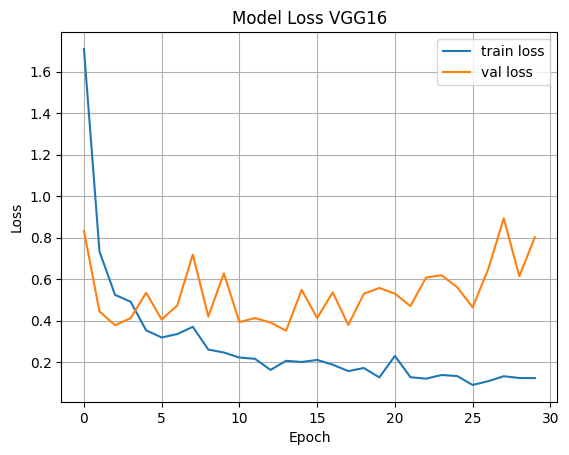

In [30]:
r = history
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Model Loss VGG16')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
#plt.xlim(1,30)
#plt.ylim(0,0.4)
plt.savefig('vgg16_e30_loss.png')  # Save the image as 'output_image.png'
plt.show()


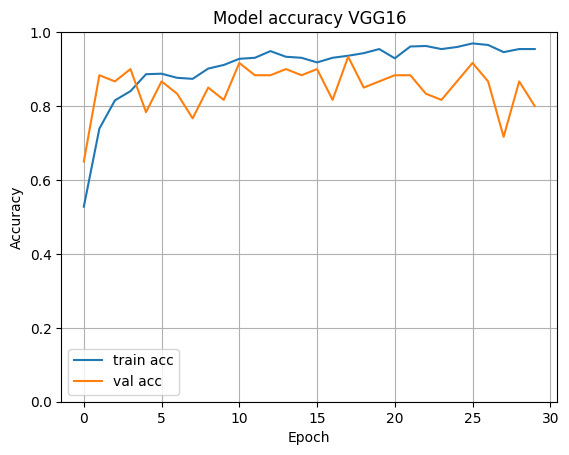

In [31]:
# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.title('Model accuracy VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
#plt.xlim(0)
#plt.ylim(0,1.4)
plt.ylim(0,1)
plt.savefig('vgg16_e30_Accuracy.png')  # Save the image as 'output_image.png'
plt.show()

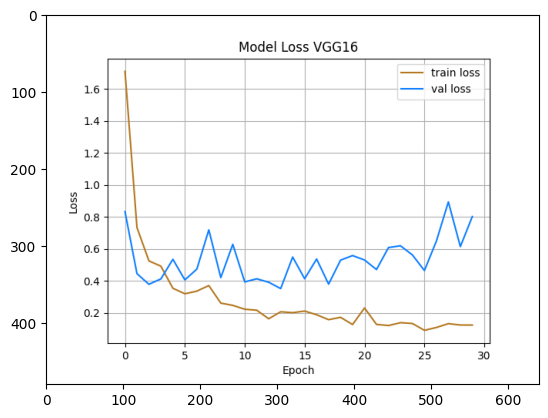

In [32]:
image_data = 'vgg16_e30_loss.png'
input_image = cv2.imread(image_data)

plt.imshow(input_image)

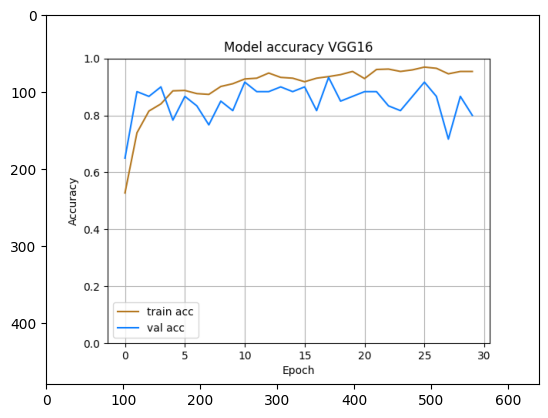

In [33]:
image_data = 'vgg16_e30_Accuracy.png'
input_image = cv2.imread(image_data)

plt.imshow(input_image)

In [25]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_vgg16_epoch30.h5')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 17926854 (68.39 MB)
Trainable params: 3212166 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [27]:
# Evaluate the model on the test data
test_loss,test_acc = model.evaluate(test_generator,verbose = 1)

print('\nTest accuracy:', test_acc)

6/6 [==============================] - 36s 7s/step - loss: 0.1239 - acc: 0.9167

Test accuracy: 0.9166666865348816


In [28]:
# Evaluate the model on the Validation data
results = model.evaluate(validation_generator)
print(results)

6/6 [==============================] - 0s 63ms/step - loss: 0.4643 - acc: 0.9167
[0.46425706148147583, 0.9166666865348816]


In [ ]:
| #keras.backend.clear_session

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/testing_images/SELF_taken/04.jpeg


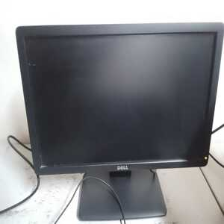

1/1 [==============================] - 1s 1s/step
The predicted class is: Monitor
It is Monitor
Class 0: 0.01%
Class 1: 6.33%
Class 2: 0.02%
Class 3: 92.59%
Class 4: 0.00%
Class 5: 1.05%


In [34]:
input_image_path = input('Path of the image to be predicted: ')


input_image = cv2.imread(input_image_path)



input_image_resized = cv2.resize(input_image, (224,224))
cv2_imshow(input_image_resized)


input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

#print(input_prediction)
class_labels = ['Keyboard','Laptop','Mobile','Monitor','Mouse','Other_class']  #  class labels
predicted_class = class_labels[input_prediction.argmax()]
print(f"The predicted class is: {predicted_class}")

if predicted_class == 'Monitor':
  print('It is Monitor')

elif predicted_class == 'Keyboard':
  print('It is Keyboard')
elif predicted_class == 'Laptop':
  print('It is Laptop')
elif predicted_class == 'Mobile':
  print('It is Mobile')
elif predicted_class == 'Mouse':
  print('It is Mouse')
elif predicted_class == 'Other_class':
  print('It is  from other class or not Ewaste')

else:
  print('The input image is not from Amongst these  classes')


# code to calculate percentages for each prediction
for prediction in input_prediction:
    softmax_output = np.array(prediction)
    percentages = (softmax_output * 100) / np.sum(softmax_output)

    # Display percentages
    for i, percentage in enumerate(percentages):
        print(f"Class {i}: {percentage:.2f}%")